In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

world_cup_matches = pd.read_csv("C:\\Users\\ianfr\\Documents\\dev\\inteligencia-computacional\\dataset\\WorldCupMatches.csv")
world_cup_matches = world_cup_matches[['Home Team Name', 'Home Team Goals', 'Away Team Goals', 'Away Team Name']]
world_cup_matches.head()

,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name
0,France,4.0,1.0,Mexico
1,USA,3.0,0.0,Belgium
2,Yugoslavia,2.0,1.0,Brazil
3,Romania,3.0,1.0,Peru
4,Argentina,1.0,0.0,France


In [5]:
world_cup_matches.mean()

Home Team Goals    1.811033
Away Team Goals    1.022300
dtype: float64

C:\Users\ianfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


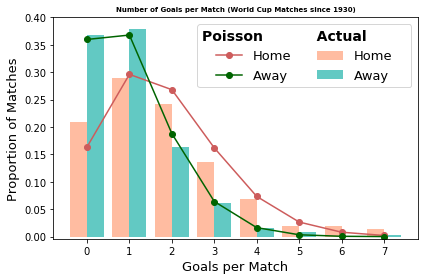

In [7]:
poisson_pred = np.column_stack([[poisson.pmf(i, world_cup_matches.mean()[j]) for i in range(8)] for j in range(2)])

plt.hist(world_cup_matches[['Home Team Goals', 'Away Team Goals']].values, range(9),
        alpha=0.7, label=['Home', 'Away'], normed=True, color=["#FFA07A", "#20B2AA"])

pois1, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,0],
                  linestyle='-', marker='o',label="Home", color = '#CD5C5C')
pois2, = plt.plot([i-0.5 for i in range(1,9)], poisson_pred[:,1],
                  linestyle='-', marker='o',label="Away", color = '#006400')

leg=plt.legend(loc='upper right', fontsize=13, ncol=2)
leg.set_title("Poisson           Actual        ", prop = {'size':'14', 'weight':'bold'})

plt.xticks([i-0.5 for i in range(1,9)],[i for i in range(9)])
plt.xlabel("Goals per Match",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Number of Goals per Match (World Cup Matches since 1930)",size=7,fontweight='bold')
plt.ylim([-0.004, 0.4])
plt.tight_layout()
plt.show()

C:\Users\ianfr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


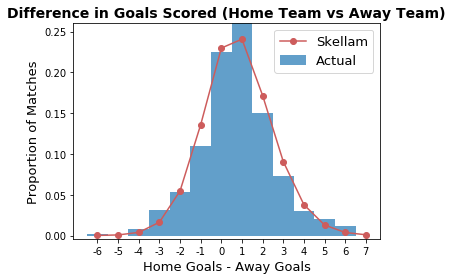

In [11]:
skellam_pred = [skellam.pmf(i,  world_cup_matches.mean()[0],  world_cup_matches.mean()[1]) for i in range(-6,8)]

plt.hist(world_cup_matches[['Home Team Goals']].values - world_cup_matches[['Away Team Goals']].values, range(-6,8), 
         alpha=0.7, label='Actual',normed=True)
plt.plot([i+0.5 for i in range(-6,8)], skellam_pred,
                  linestyle='-', marker='o',label="Skellam", color = '#CD5C5C')
plt.legend(loc='upper right', fontsize=13)
plt.xticks([i+0.5 for i in range(-6,8)],[i for i in range(-6,8)])
plt.xlabel("Home Goals - Away Goals",size=13)
plt.ylabel("Proportion of Matches",size=13)
plt.title("Difference in Goals Scored (Home Team vs Away Team)",size=14,fontweight='bold')
plt.ylim([-0.004, 0.26])
plt.tight_layout()
plt.show()

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

goal_model_data = pd.concat([world_cup_matches[['Home Team Name','Away Team Name','Home Team Goals']].assign(home=1).rename(
            columns={'Home Team Name':'team', 'Away Team Name':'opponent','Home Team Goals':'goals'}),
           world_cup_matches[['Away Team Name','Home Team Name','Away Team Goals']].assign(home=0).rename(
            columns={'Away Team Name':'team', 'Home Team Name':'opponent','Away Team Goals':'goals'})])

poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                 1704
Model:                            GLM   Df Residuals:                     1538
Model Family:                 Poisson   Df Model:                          165
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2433.2
Date:                Sat, 07 Sep 2019   Deviance:                       1869.9
Time:                        17:15:58   Pearson chi2:                 1.68e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -0.2453      0.353     -0.694      0.487      -0.938       0.447
team[T.Angola]                            -1.0943      1.045     -1.047      0.295      -3.143       0.954
team[T.Argentina]                          0.3676      0.289      1.274      0.203      -0.198       0.933
team[T.Australia]                          0.0675      0.412      0.164      0.870      -0.740       0.875
team[T.Austria]                            0.4879      0.314      1.555      0.120      -0.127       1.103
team[T.Belgium]                            0.1928      0.306      0.630      0.529      -0.407       0.793
team[T.Bolivia]                           -1.5808      1.038     -1.524      0.128      -3.614       0.453
team[T.Brazil]                             0.6699      0.283      2.371      0.018       0.116       1.224
team[T.Bulgaria]                          -0.0517      0.349     -0.148      0.882      -0.736       0.632
team[T.Cameroon]                          -0.1711      0.362     -0.473      0.636      -0.881       0.538
team[T.Canada]                           -22.2095   2.47e+04     -0.001      0.999   -4.84e+04    4.83e+04
team[T.Chile]                              0.2768      0.317      0.874      0.382      -0.344       0.897
team[T.China PR]                         -22.2067   2.45e+04     -0.001      0.999   -4.81e+04    4.81e+04
team[T.Colombia]                           0.3795      0.335      1.131      0.258      -0.278       1.037
team[T.Costa Rica]                         0.0873      0.368      0.237      0.813      -0.634       0.809
team[T.Croatia]                            0.3503      0.357      0.982      0.326      -0.349       1.049
team[T.Cuba]                               0.4024      0.545      0.739      0.460      -0.665       1.470
team[T.Czech Republic]                     0.0161      0.648      0.025      0.980      -1.253       1.286
team[T.Czechoslovakia]                     0.5361      0.313      1.712      0.087      -0.078       1.150
team[T.C�te d'Ivoire]                      0.2353      0.404      0.582      0.561      -0.557       1.028
team[T.Denmark]                            0.5844      0.338      1.728      0.084      -0.079       1.247
team[T.Dutch East Indies]                -22.4123   4.31e+04     -0.001      1.000   -8.46e+04    8.45e+04
team[T.Ecuador]                            0.1842      0.422      0.437      0.662      -0.643       1.011
team[T.Egypt]                              0.1647      0.646      0.255      0.799      -1.101       1.430
team[T.El Salvador]                       -1.6242      1.039     -1.564      0.118      -3.660       0.412
team[T.England]                            0.2770      0.296      0.935      0.350     

In [14]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam, 
                                                            'opponent': awayTeam,'home':1},
                                                      index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam, 
                                                            'opponent': homeTeam,'home':0},
                                                      index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

simulate_match(poisson_model, 'Brazil', 'Argentina', max_goals=3)

array([[0.06389543, 0.06126115, 0.02936774, 0.00938566],
       [0.1144837 , 0.10976377, 0.05261922, 0.01681661],
       [0.10256225, 0.09833382, 0.04713986, 0.01506546],
       [0.06125481, 0.0587294 , 0.02815405, 0.00899777]])

In [15]:
simulate_match(poisson_model, 'Argentina', 'Brazil', max_goals=3)

array([[0.07199556, 0.08654708, 0.05201985, 0.02084465],
       [0.1028841 , 0.12367871, 0.07433813, 0.02978771],
       [0.07351243, 0.08837054, 0.05311586, 0.02128382],
       [0.03501726, 0.04209483, 0.02530146, 0.01013844]])

In [17]:
bra_arg = simulate_match(poisson_model, 'Brazil', 'Argentina', max_goals=3)
np.sum(np.tril(bra_arg, -1))

0.4635180277552175

In [18]:
np.sum(np.diag(bra_arg))

0.22979682977704155

In [19]:
np.sum(np.triu(bra_arg, 1))

0.18451583376192088